In [1]:
import os

cur = os.getcwd()
print(cur)

C:\Users\risha\Desktop\Stride.ai Practice Work


In [2]:
import pandas as pd
import flair
import re

In [3]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [4]:
df_train.head(10)

,label,text
0,1,our deeds are the reason of this earthquake m...
1,1,forest fire near la ronge sask. canada
2,1,all residents asked to 'shelter in place' are ...
3,1,13 000 people receive wildfires evacuation or...
4,1,just got sent this photo from ruby alaska as ...
5,1,rockyfire update => california hwy. 20 closed ...
6,1,flood disaster heavy rain causes flash floodi...
7,1,i'm on top of the hill and i can see a fire in...
8,1,is an emergency evacuation happening now in th...
9,1,i'm afraid the tornado is coming to our area...


In [6]:
df_train.dropna(inplace=True)

In [7]:
df_train

,label,text
0,1,our deeds are the reason of this earthquake m...
1,1,forest fire near la ronge sask. canada
2,1,all residents asked to 'shelter in place' are ...
3,1,13 000 people receive wildfires evacuation or...
4,1,just got sent this photo from ruby alaska as ...
...,...,...
7608,1,two giant cranes holding a bridge collapse int...
7609,1,aria_ahrary thetawniest the out of control wi...
7610,1,m1.94 01:04 utc 5km s of volcano hawaii. htt...
7611,1,police investigating after an e-bike collided ...


In [8]:
cList = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(cList.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return cList[match.group(0)]
    return c_re.sub(replace, text)

In [9]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,?#]')
def clean_text(text):
    text = text.lower()
    text = text.strip()
    text = text.lstrip()   
    text = text.rstrip()
    text = expandContractions(text)
    text = REPLACE_BY_SPACE_RE.sub(' ', text)
    text = re.sub(r"https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+"," ",text)
    text = re.sub(r"\$\d+", " ",text)
    text = re.sub(r'[\w\.-]+@[\w\.-]+', " ",text)
    text = re.sub(r'\b(me|her|him|us|them|there|that)\b', " ",text)  
    return text

In [10]:
#df_train['text'] = df_train['text'].astype(str).apply(clean_text)

In [11]:
from sklearn.utils import shuffle
df = shuffle(df_train)

df

,label,text
7481,1,the sunset boys wreck my bed original 1979 u...
7491,1,wreck with road blockage woodward avenue north...
5578,0,former freedom surf spa razed to make way for ...
96,0,has an accident changed your life we will hel...
6127,0,today is corii siren's birthday! spoil now: ...
...,...,...
5943,1,i just screamed toddyrockstar http: t.co jdt...
6042,0,england east coast. dogger bank westward. 1. s...
1309,1,flames visible from fire in tucson mountains: ...
6971,0,i liked a youtube video http: t.co 0h7oua1pn...


In [12]:
!mkdir data

A subdirectory or file data already exists.


In [13]:
df.iloc[0:int(len(df)*0.8)].to_csv('data/train.csv', sep='\t', index = False, header = False)
df.iloc[int(len(df)*0.8):int(len(df)*0.9)].to_csv('data/test.csv', sep='\t', index = False, header = False)
df.iloc[int(len(df)*0.9):].to_csv('data/dev.csv', sep='\t', index = False, header = False);

In [15]:
from flair.data import Corpus
from flair.datasets import CSVClassificationCorpus
from flair.embeddings import WordEmbeddings, FlairEmbeddings, DocumentRNNEmbeddings
from flair.models import TextClassifier
from flair.trainers import ModelTrainer

data_folder = r'data/'

column_name_map = {1:'text',0:'label'}

corpus: Corpus = CSVClassificationCorpus(data_folder,
                                         column_name_map,
                                         skip_header=True,
                                         delimiter='\t',    # tab-separated files
) 

word_embeddings = [WordEmbeddings('glove'), FlairEmbeddings('news-forward-fast'), FlairEmbeddings('news-backward-fast')]
document_embeddings = DocumentRNNEmbeddings(word_embeddings, hidden_size=256)
#document_embeddings = DocumentLSTMEmbeddings(word_embeddings, hidden_size=512, reproject_words=True, reproject_words_dimension=256)
classifier = TextClassifier(document_embeddings, label_dictionary=corpus.make_label_dictionary(), multi_label=False)
trainer = ModelTrainer(classifier, corpus)
trainer.train('model/', max_epochs=10)

2020-06-20 03:42:24,390 Reading data from data
2020-06-20 03:42:24,390 Train: data\train.csv
2020-06-20 03:42:24,390 Dev: data\dev.csv
2020-06-20 03:42:24,390 Test: data\test.csv
2020-06-20 03:42:26,038 Computing label dictionary. Progress:


100%|████████████████████████████████████████████████████████████████████████████| 6849/6849 [00:05<00:00, 1177.94it/s]

2020-06-20 03:43:59,204 [b'1', b'0']
2020-06-20 03:43:59,212 ----------------------------------------------------------------------------------------------------
2020-06-20 03:43:59,212 Model: "TextClassifier(
  (document_embeddings): DocumentRNNEmbeddings(
    (embeddings): StackedEmbeddings(
      (list_embedding_0): WordEmbeddings('glove')
      (list_embedding_1): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
      (list_embedding_2): FlairEmbeddings(
        (lm): LanguageModel(
          (drop): Dropout(p=0.25, inplace=False)
          (encoder): Embedding(275, 100)
          (rnn): LSTM(100, 1024)
          (decoder): Linear(in_features=1024, out_features=275, bias=True)
        )
      )
    )
    (word_reprojection_map): Linear(in_features=2148, out_features=2148, 

2020-06-20 03:46:09,768 epoch 1 - iter 19/191 - loss 0.84557807 - samples/sec: 10.60
2020-06-20 03:47:07,495 epoch 1 - iter 38/191 - loss 0.74818811 - samples/sec: 10.59
2020-06-20 03:48:11,738 epoch 1 - iter 57/191 - loss 0.71502714 - samples/sec: 9.51
2020-06-20 03:49:13,118 epoch 1 - iter 76/191 - loss 0.69998035 - samples/sec: 9.96
2020-06-20 03:50:30,945 epoch 1 - iter 95/191 - loss 0.68433416 - samples/sec: 8.61
2020-06-20 03:51:33,237 epoch 1 - iter 114/191 - loss 0.67687542 - samples/sec: 9.81
2020-06-20 03:52:39,011 epoch 1 - iter 133/191 - loss 0.66381033 - samples/sec: 9.28
2020-06-20 03:53:38,767 epoch 1 - iter 152/191 - loss 0.65460109 - samples/sec: 10.22
2020-06-20 03:54:42,866 epoch 1 - iter 171/191 - loss 0.65156871 - samples/sec: 9.52
2020-06-20 03:56:07,263 epoch 1 - iter 190/191 - loss 0.64922115 - samples/sec: 7.40
2020-06-20 03:59:11,810 ----------------------------------------------------------------------------------------------------
2020-06-20 03:59:11,810 EPO

{'test_score': 0.6986842105263158,
 'dev_score_history': [0.7148488830486203, 0.5479632063074902],
 'train_loss_history': [0.6483360541428571, 0.5537355833964822],
 'dev_loss_history': [0.5442241430282593, 0.850999116897583]}

2020-06-20 04:31:43,720 ----------------------------------------------------------------------------------------------------
2020-06-20 04:31:43,720 WARNING: No LOSS found for test split in this data.
2020-06-20 04:31:43,720 Are you sure you want to plot LOSS and not another value?
2020-06-20 04:31:43,731 ----------------------------------------------------------------------------------------------------
2020-06-20 04:31:43,902 ----------------------------------------------------------------------------------------------------
2020-06-20 04:31:43,902 WARNING: No F1 found for test split in this data.
2020-06-20 04:31:43,902 Are you sure you want to plot F1 and not another value?
2020-06-20 04:31:43,918 ----------------------------------------------------------------------------------------------------
Loss and F1 plots are saved in model\training.png


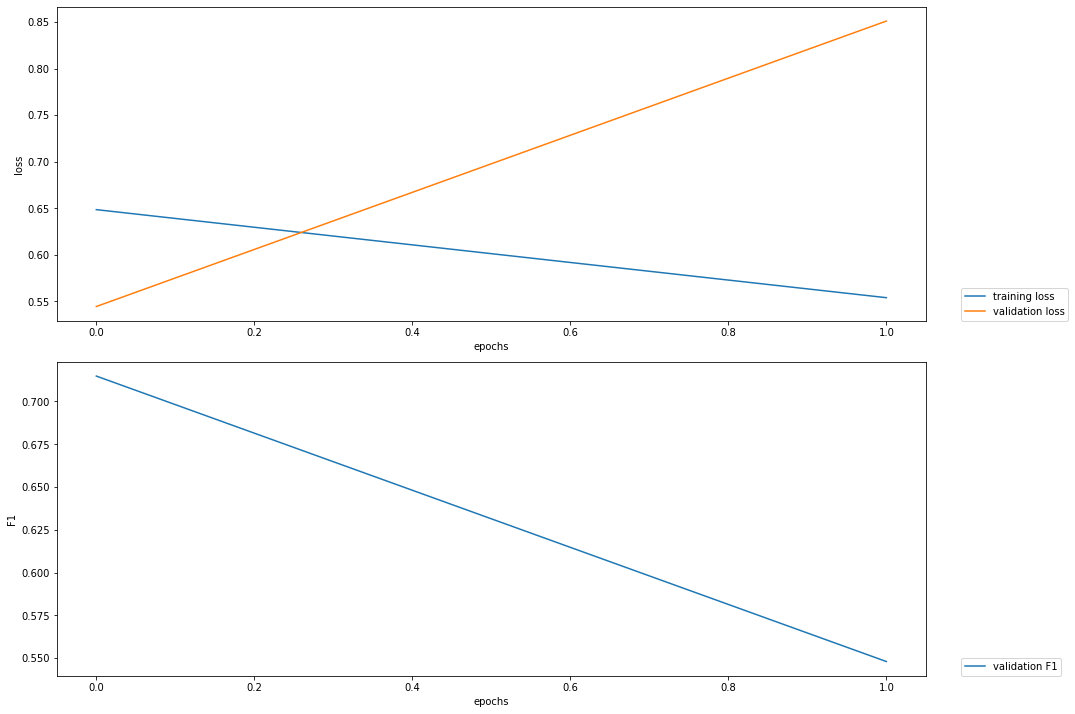

Weights plots are saved in model\weights.png


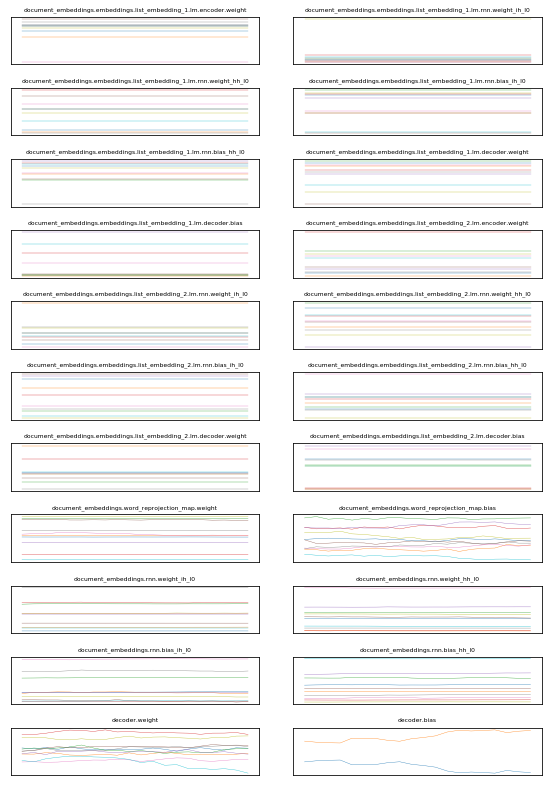

In [16]:
from flair.visual.training_curves import Plotter
plotter = Plotter()
plotter.plot_training_curves('model/loss.tsv')
plotter.plot_weights('model/weights.txt')

In [17]:
from flair.data import Sentence

classifier = TextClassifier.load('model/final-model.pt')

2020-06-20 04:35:33,470 loading file model/final-model.pt


In [18]:
def predict(text, model=None):
    sentence = Sentence(text)
    if model:
        model.predict(sentence)
    else:
        classifier.predict(sentence)
    return sentence.labels[0].value

In [21]:
from tqdm import tqdm

predict_on = list()

for text in tqdm(df_test.text):
    out = predict(text)
    predict_on.append(out)

100%|██████████████████████████████████████████████████████████████████████████████| 3263/3263 [22:06<00:00,  2.46it/s]


In [22]:
submission = pd.read_csv("sample_submission.csv")

In [30]:
submission['target'] = predict_on
submission.to_csv('submission.csv', index=False)

In [31]:
!pip install kaggle

In [32]:
!kaggle competitions submit -c nlp-getting-started -f submission.csv -m "Hurrraay"

Successfully submitted to Real or Not? NLP with Disaster Tweets



  0%|          | 0.00/25.4k [00:00<?, ?B/s]
 31%|###1      | 8.00k/25.4k [00:00<00:00, 41.2kB/s]
100%|##########| 25.4k/25.4k [00:08<00:00, 3.21kB/s]
